In [1]:
from data import DATA 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding,SpatialDropout1D,LSTM,GRU,Dense,Dropout
from tensorflow.keras.models import Sequential
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = DATA()
x_train,x_test,y_train,y_test = data.load(return_type='raw')

data splitted 


In [3]:
token = Tokenizer()
token.fit_on_texts(x_train)

In [4]:
word_index = token.word_index
x_train = pad_sequences(token.texts_to_sequences(x_train),maxlen=70)
x_test = pad_sequences(token.texts_to_sequences(x_test),maxlen=70)

## LSTM 

In [5]:
model_lstm = Sequential([


    Embedding(len(word_index)+1,64,input_length=70),
    LSTM(100),
    Dropout(0.25),
    Dense(1,activation='sigmoid')
    
])

model_lstm.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])

C:\Users\RISHABH\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [6]:
history  = model_lstm.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 53ms/step - acc: 0.8725 - loss: 0.3951 - val_acc: 0.9000 - val_loss: 0.3016
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - acc: 0.9257 - loss: 0.2391 - val_acc: 0.9063 - val_loss: 0.2381
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - acc: 0.9600 - loss: 0.1263 - val_acc: 0.9159 - val_loss: 0.2976
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - acc: 0.9791 - loss: 0.0583 - val_acc: 0.9111 - val_loss: 0.2453
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - acc: 0.9855 - loss: 0.0429 - val_acc: 0.9159 - val_loss: 0.3021
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - acc: 0.9890 - loss: 0.0275 - val_acc: 0.9111 - val_loss: 0.3510
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - acc: 0.9922 - loss: 0.0274 - val_acc: 0.9190 - val_loss: 0.3979
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - acc: 0.9935 - loss: 0.0224 - val_acc: 0.9143 - val_loss: 0.4081
Epoch 9/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - acc: 0.9934

In [7]:
loss,acc = model_lstm.evaluate(x_test,y_test)
acc

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - acc: 0.9044 - loss: 0.4981


0.9222221970558167

<Axes: title={'center': 'acc'}>

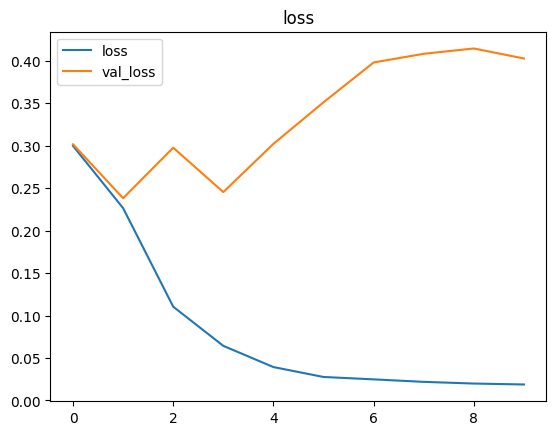

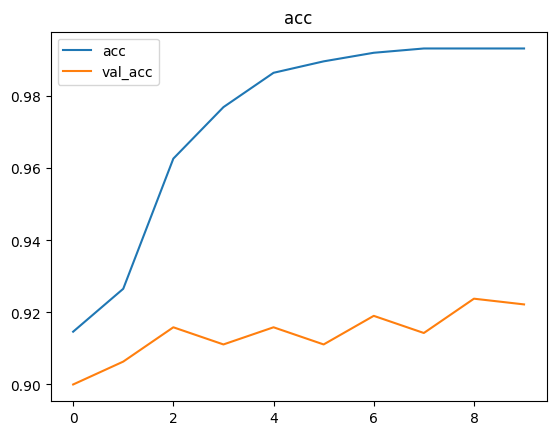

In [8]:
history_df = pd.DataFrame(history.history)
history_df[['loss','val_loss']].plot(title='loss')
history_df[['acc','val_acc']].plot(title='acc')

## GRU

In [11]:
model_gru = Sequential([


    Embedding(len(word_index)+1,300),
    SpatialDropout1D(0.3),
    GRU(100),
    Dense(50,activation='relu'),
    Dropout(0.25),
    Dense(1,activation='sigmoid')


    
])

model_gru.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])

In [12]:
history  = model_gru.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 86ms/step - acc: 0.8796 - loss: 0.4394 - val_acc: 0.9000 - val_loss: 0.2713
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 92ms/step - acc: 0.9276 - loss: 0.1756 - val_acc: 0.9159 - val_loss: 0.2415
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 89ms/step - acc: 0.9728 - loss: 0.0743 - val_acc: 0.9206 - val_loss: 0.2646
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 89ms/step - acc: 0.9829 - loss: 0.0475 - val_acc: 0.9238 - val_loss: 0.3535
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 83ms/step - acc: 0.9895 - loss: 0.0278 - val_acc: 0.9302 - val_loss: 0.3761
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 11s 88ms/step - acc: 0.9956 - loss: 0.0167 - val_acc: 0.9270 - val_loss: 0.4511
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 80ms/step - acc: 0.9916 - loss: 0.0178 - val_acc: 0.9270 - val_loss: 0.4626
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 90ms/step - acc: 0.9939 - loss: 0.0161 - val_acc: 0.9286 - val_loss: 0.5109
Epoch 9/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 83ms/step - acc: 0.99

In [13]:
loss,acc = model_gru.evaluate(x_test,y_test)
acc

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - acc: 0.9008 - loss: 0.7447


0.9269841313362122